#4.3.1: Introduction to Network Analysis:
- Learn about the basic components of `networks` and the `graphs` that represent them
- Learn basic network concepts such as `neighbor, degree, path, component,` and `largest connected component`

Difference between Network and Graph:
- `Network`: Real life object (e.g. Road Network)
- `Graph`: Representation of Network (Abstract mathematical representation)

Graphs consist of:
- `Vertices/ Nodes`: Components
- `Links/ Edges`: Interactions


What is a path in a network?
- A sequence of edges connecting two nodes

What is a connected component in a network?
- A group of nodes and their edges for which a path exists between each node in the component

#4.3.2: Basics of NetworkX
- Learn how to use the NetworkX module to create and manipulate network graphs

**"Important Note"**
- Previously, `G.nodes()` returned a list object, while now it returns a `NodeView object`. 
- Previously, `G.edges()` returned a list object, while now it returns an `EdgeView object`. 

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from(["u","v"])
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [ ]:
G.add_edge(1,2)
G.add_edge("u", "v")
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])
G.add_edge("u", "w")

G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [ ]:
G.remove_node(2)

G.nodes()

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

In [ ]:
G.remove_nodes_from([4,5])

G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [ ]:
G.remove_edge(1,3)

G.edges()

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [ ]:
G.remove_edges_from([(1,2), ("u","v")])

G.edges()

EdgeView([(1, 6), ('u', 'w')])

In [ ]:
G.number_of_nodes()

6

In [ ]:
G.number_of_edges()

2

# 4.3.3: Graph Visualization
- Learn how to use networkx to visualize a graph

**Important Notes**

- Previously, `G.degree()` returned a Python dictionary, while now it returns a `DegreeView object`, which is similar to a dictionary.

In [ ]:
G = nx.karate_club_graph()

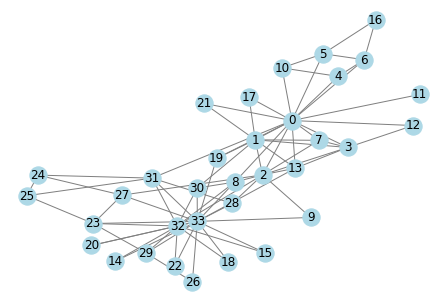

In [ ]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels = True, node_color = "lightblue", edge_color = "gray")

# plt.savefig("karate_graph.pdf")

In [ ]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [ ]:
max(G.degree())

(33, 17)

In [ ]:
G.degree()[33]

17

In [ ]:
G.degree(33)

17

How many nodes and edges are included in the karate club network

In [ ]:
len(G.nodes()), len(G.edges())

(34, 78)

What does G.degree(0) is G.degree()[0] return?

In [ ]:
G.degree(0) is G.degree()[0]

True

# 4.3.4: Random Graphs
- Learn how to write a function to build an `Erdős-Rényi graph`
- 2 parameters
  - N = number of nodes
  - p = probability of connection

In [ ]:
from scipy.stats import bernoulli

bernoulli.rvs(p = 0.2) # p = prop of success

1

In [ ]:
N = 20
p = 0.2

def er_graph(N, p):
  """
  Generate an ER graph.
  """
  # create empty graph
  G = nx.Graph()

  # add all N nodes in the graph
  G.add_nodes_from(range(N))

  # loop over all pairs of nodes 
  for node1 in G.nodes(): 
    for node2 in G.nodes():
      # add an edge with prob p
      if node1 < node2 and bernoulli.rvs(p = p):
        G.add_edge(node1, node2)
  
  return G

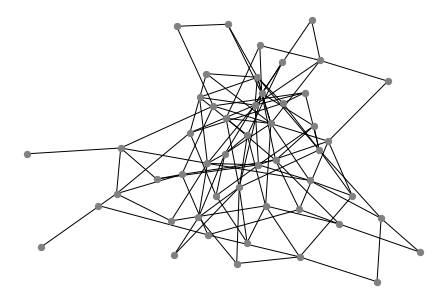

In [ ]:
nx.draw(er_graph(50, 0.08), node_size = 40, node_color = "gray")

# plt.savefig("er1.pdf")

How many components do you expect in an Erdős-Rényi graph with n=10 and p=1?
- p=1 means an edge exists between each node pair, making the network consist of one component.


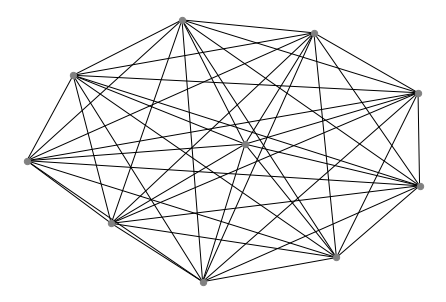

In [ ]:
nx.draw(er_graph(10, 1), node_size = 40, node_color = "gray")

How many components do you expect in an Erdős-Rényi graph with n=10 and p=0?
- p=0 means the network will contain no edges, so each node is also its own component.


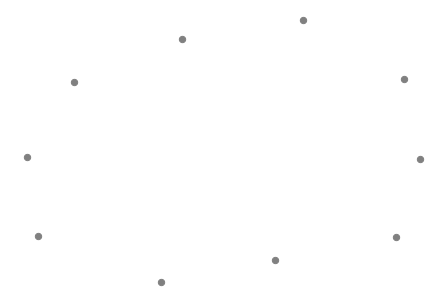

In [ ]:
nx.draw(er_graph(10, 0), node_size = 40, node_color = "gray")

# 4.3.5: Plotting the Degree Distribution
- Learn how to plot the degree distribution of a graph

**Important Note**
Note that `G.degree()` now returns a `DegreeView object` rather than a dictionary.

- `plt.hist(list(G.degree().values()), histtype="step”)`

The above line must be replaced with the following lines of code:

- `degree_sequence = [d for n, d in G.degree()]`
- `plt.hist(degree_sequence, histtype="step")`


In [ ]:
def plot_degree_distribution(G):
  degree_sequence = [d for n, d in G.degree()] 
  plt.hist(degree_sequence, histtype="step")
  plt.xlabel("Degree $k$")
  plt.ylabel("$P(k)$")
  plt.title("Degree distribution")

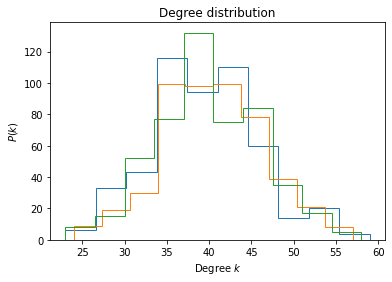

In [ ]:
G = er_graph(500, 0.08)
plot_degree_distribution(G)

G2 = er_graph(500, 0.08)
plot_degree_distribution(G2)

G3 = er_graph(500, 0.08)
plot_degree_distribution(G3)


# plt.savefig("hist1.pdf")

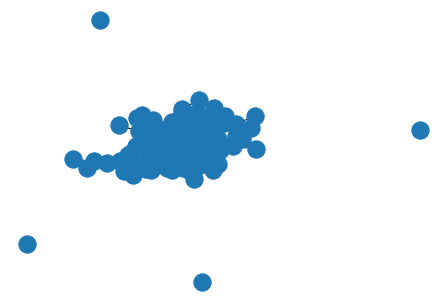

In [ ]:
nx.draw(nx.erdos_renyi_graph(100, 0.03))

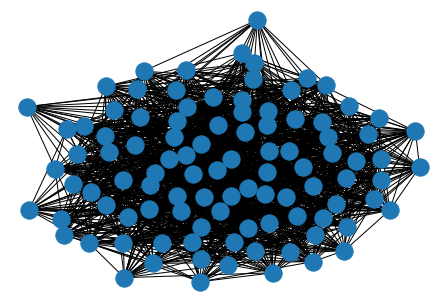

In [ ]:
nx.draw(nx.erdos_renyi_graph(100, 0.30))

How do the degree distributions in nx.erdos_renyi_graph(100, 0.03) and nx.erdos_renyi_graph(100, 0.30) compare?

- The latter distribution has a greater mean on average.


# 4.3.6: Descriptive Statistics of Empirical Social Networks

- Look at the basic properties of social networks in two villages in rural India
- Compare the degree distribution of these empirical networks with the degree distribution of the ER networks

**Important Nodes**

- `print("Average degree: %.2f" % np.mean(list(G.degree().values)))`

The above line must be replaced with the following lines of code:

- `degree_sequence = [d for n, d in G.degree()]`
- `print("Average degree: %.2f" % np.mean(degree_sequence))`


##Data:

- Village number 1 data can be downloaded here: `https://courses.edx.org/assets/courseware/v1/73e495dede402cd2b4a6087725fdad19/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/adj_allVillageRelationships_vilno_1.csv`

- Village number 2 data can be downloaded here: `https://courses.edx.org/assets/courseware/v1/e39da5bc543c636c1c4c8bd376fb8c44/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/adj_allVillageRelationships_vilno_2.csv`

- The data described in this video are from Banerjee et al. 2013: The Diffusion of Microfinance External link.
`https://science.sciencemag.org/content/341/6144/1236498.full`

In [ ]:
import numpy as np 

#Load in the Adjacency matrices
A1 = np.loadtxt("https://courses.edx.org/assets/courseware/v1/73e495dede402cd2b4a6087725fdad19/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/adj_allVillageRelationships_vilno_1.csv",
           delimiter = ",")

A2 = np.loadtxt("https://courses.edx.org/assets/courseware/v1/e39da5bc543c636c1c4c8bd376fb8c44/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/adj_allVillageRelationships_vilno_2.csv",
           delimiter = ",")

G1 = nx.to_networkx_graph(A1)

G2 = nx.to_networkx_graph(A2)

In [ ]:
def basic_net_stats(G):
  print(f"Number of nodes: {G.number_of_nodes()}")
  print(f"Number of edges: {G.number_of_edges()}")
  degree_sequence = [d for n,d in G.degree()]
  print(f"Average degree: {np.mean(degree_sequence)}")

In [ ]:
basic_net_stats(G1)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.078291814946619


In [ ]:
basic_net_stats(G2)

Number of nodes: 877
Number of edges: 3063
Average degree: 6.985176738882554


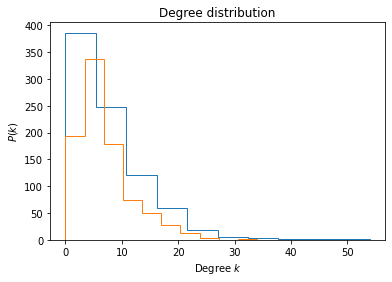

In [ ]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)

# plt.savefig("village_hist.pdf")

# 4.3.7: Finding the Largest Connected Component

- Learn how to find the largest connected component in a network
- Learn how to visualize the largest connected component

In [ ]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [ ]:
nx.connected_components(G1)

<generator object connected_components at 0x7fb801e59c50>

In [ ]:
gen = connected_component_subgraphs(G1)
g = gen.__next__()
type(g)

networkx.classes.graph.Graph

In [ ]:
len(gen.__next__())

3

In [ ]:
len(gen.__next__())

3

In [ ]:
len(gen.__next__())

4

In [ ]:
len(G1)

843

In [ ]:
G1.number_of_nodes()

843

In [ ]:
# LCC = largest connected component
G1_LCC = max(connected_component_subgraphs(G1), key = len)

G2_LCC = max(connected_component_subgraphs(G2), key = len)

In [ ]:
len(G1_LCC)

825

In [ ]:
len(G2_LCC)

810

In [ ]:
# 97.86 % of nodes are contained within the largest connected component
len(G1_LCC) / len(G1)

0.9786476868327402

In [ ]:
len(G2_LCC) / len(G2)

0.9236031927023945

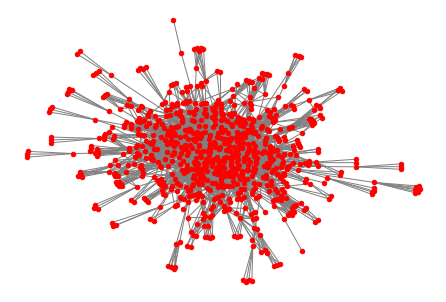

In [ ]:
plt.figure()
nx.draw(G1_LCC, 
        node_color = "red", 
        edge_color= "gray",
        node_size = 20)

# plt.savefig("village1.pdf")

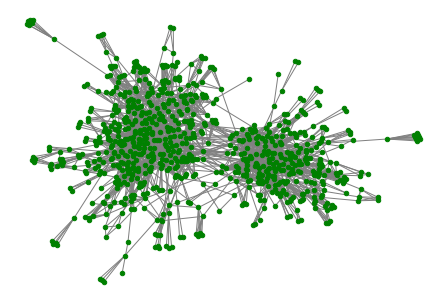

In [ ]:
plt.figure()
nx.draw(G2_LCC, 
        node_color = "green", 
        edge_color= "gray",
        node_size = 20)

#plt.savefig("village2.pdf")

For an iterator object X, what does X.__next__() do?
- Returns the next value in X, if it exists

For a given network G, what does len(G) return?
- The number of nodes

